# Text Generation

## Introduction

Markov chains can be used for basic text generation. We can make a simple assumption that the next word is only dependent on the previous word - which is the basic assumption of a Markov chain. Markov chains don't generate text as well as deep learning but we can start with this.

## Text to Imitate

In this, we're specifically going to generate text in the style of Ronny Chieng, so as a first step, let's extract the text from his comedy routine.

In [ ]:
# Read in the corpus, including punctuation!
import pandas as pd

data = pd.read_pickle('corpus_original.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney
mike,"Wow. Hey, thank you. Thanks. Thank you, guys. ...",Mike Birbiglia
ronny,[tuning] [gentle Hawaiian music playing over r...,Ronny Chieng


In [ ]:
# Extract only Ronny Chieng's text
ronny_text = data.transcript.loc['ronny']
ronny_text[:200]

'[tuning] [gentle Hawaiian music playing over radio] [revving] [announcer] Ladies and gentlemen, make some noise for Ronny Chieng! [crowd cheering] [upbeat music playing] [crowd continues cheering] [mu'

## Build a Markov Chain Function

We are going to build a simple Markov chain function that creates a dictionary:
* The keys should be all of the words in the corpus
* The values should be a list of the words that follow the keys

In [ ]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''

    # Tokenize the text by word, though including punctuation
    words = text.split(' ')

    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)

    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [ ]:
# Create the dictionary for Ronny's routine, take a look at it
ronny_dict = markov_chain(ronny_text)
ronny_dict

{'[tuning]': ['[gentle'],
 '[gentle': ['Hawaiian', 'Hawaiian', 'Hawaiian'],
 'Hawaiian': ['music', 'music', 'music'],
 'music': ['playing', 'playing]', 'playing]', 'continues'],
 'playing': ['over'],
 'over': ['radio]', 'this', 'here.', 'her,', 'her,', 'offense.'],
 'radio]': ['[revving]'],
 '[revving]': ['[announcer]'],
 '[announcer]': ['Ladies'],
 'Ladies': ['and'],
 'and': ['gentlemen,',
  'dreams.',
  'they',
  'post',
  'someone',
  'after',
  'they',
  'I',
  'science',
  'inject',
  'kill',
  'applause]',
  'a',
  'killed',
  'then',
  'then',
  'she’s',
  'below',
  'the',
  'I’m',
  'then',
  'then',
  'tight.',
  'snug.',
  'I',
  'I’m',
  'this',
  'I',
  'she',
  'then',
  'then',
  'you',
  'she’ll',
  'she’ll',
  'these',
  'analytics.',
  'become',
  'sciatica.”',
  'lucrative.',
  'it',
  'tell',
  'make',
  'I',
  'financial',
  'they’re',
  'then,',
  'life',
  'came',
  'he',
  'a',
  'who’s',
  'we’re',
  'the',
  'welcoming.',
  'I',
  'show',
  'you',
  'I,',
  'd

## Create a Text Generator

We're going to create a function that generates sentences. It will take two things as inputs:
* The dictionary we just created
* The number of words we want to be generated


In [ ]:
import random

def generate_sentence(chain, count=15):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [ ]:
generate_sentence(ronny_dict)

'Made it expires quicker than you go out. They’re like, “Hey, Ronny. Look at the.'

**1. Enhanced Sentence Generator with Early Termination on Punctuation**

**This generator will:**

End early if a word ends with punctuation like ., !, or ?

Use a fallback if the current word has no next word

In [ ]:
def generate_sentence_enhanced(chain, count=15):
    '''Generates a sentence using a Markov chain.
       Ends if it reaches a word ending with punctuation, or after count words.'''

    punctuations = ['.', '!', '?']
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    for i in range(count - 1):
        if word1 in chain:
            word2 = random.choice(chain[word1])
        else:
            word2 = random.choice(list(chain.keys()))  # fallback
        sentence += ' ' + word2
        if word2[-1:] in punctuations:
            break
        word1 = word2
    else:
        sentence += random.choice(punctuations)  # if no punctuation found

    return sentence

# Generate 5 example sentences using Ronny's dict
for _ in range(5):
    print(generate_sentence_enhanced(ronny_dict))


Themselves. There’s eight of my jizz and respect the capital gains tax… [crowd laughing] Never?
Honolulu. [crowd laughing] “Fuck this person.” “I guess the direction of this real?” “Look how!
Pain. I get a real…?
Okay?” I’m like, “You can’t even scared of that, and they vape out of inflation.
Culture. They’re… Everyone’s… They’ve got to meet the equation.


In [ ]:
import random

def ends_with_terminal_punctuation(word):
    '''Returns True if the word ends with ., !, or ? after stripping trailing quotes/brackets.'''
    punctuations = ['.', '!', '?']
    word = word.rstrip('\'"”’)]}')  # Strip common closing punctuation wrappers
    return word[-1:] in punctuations

def generate_sentence_enhanced(chain, count=15):
    '''Generates a sentence using a Markov chain.
       Ends if it reaches a word ending with punctuation, or after count words.'''

    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    for _ in range(count - 1):
        if word1 in chain:
            word2 = random.choice(chain[word1])
        else:
            word2 = random.choice(list(chain.keys()))  # fallback
        sentence += ' ' + word2
        if ends_with_terminal_punctuation(word2):
            break
        word1 = word2
    else:
        sentence += random.choice(['.', '!', '?'])  # if no punctuation found

    return sentence

# Generate 5 example sentences using Ronny's dict
for _ in range(5):
    print(generate_sentence_enhanced(ronny_dict))


Economics there.
Master’s of my wife ended up MVP numbers.
Said two weeks.
Us that conversation with them, and you touch your mind.
Langone Hospital, please.


**2. Statistics & Visualization**

Let’s analyze Ronny’s Markov chain

<ipython-input-12-64ff111157f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Next_Word_Count', y='Word', data=top_words_df, palette='viridis')


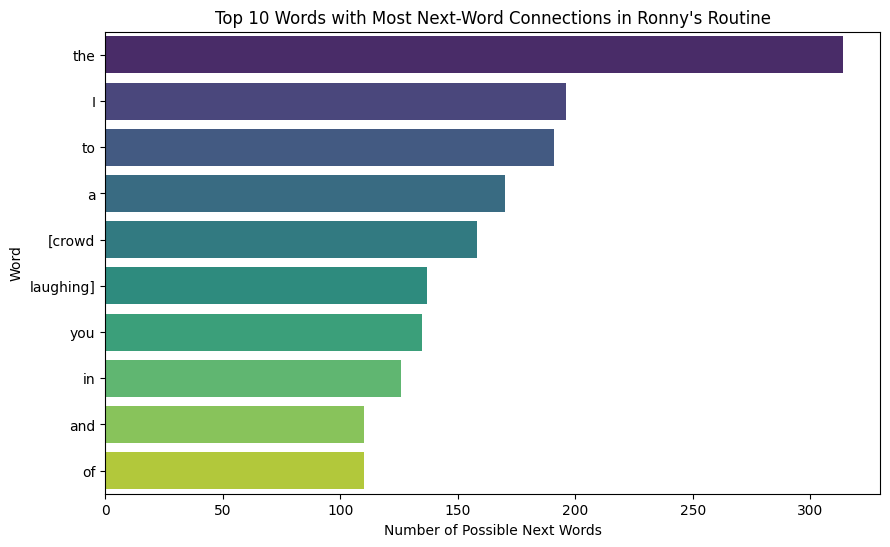

In [ ]:
# Top 10 words with the most next-word options

import matplotlib.pyplot as plt
import seaborn as sns

word_next_counts = {word: len(next_words) for word, next_words in ronny_dict.items()}
top_words = sorted(word_next_counts.items(), key=lambda x: x[1], reverse=True)[:10]

top_words_df = pd.DataFrame(top_words, columns=['Word', 'Next_Word_Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Next_Word_Count', y='Word', data=top_words_df, palette='viridis')
plt.xlabel('Number of Possible Next Words')
plt.ylabel('Word')
plt.title("Top 10 Words with Most Next-Word Connections in Ronny's Routine")
plt.show()


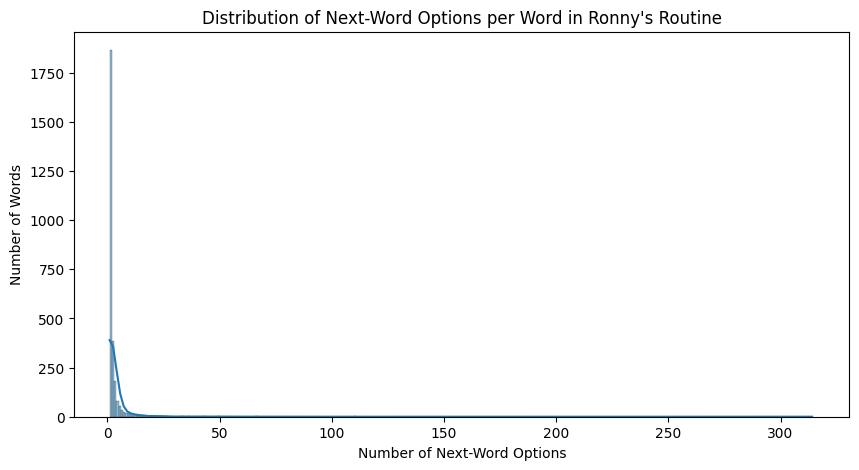

In [ ]:
#Distribution of next-word options

plt.figure(figsize=(10, 5))
sns.histplot(list(word_next_counts.values()), bins=range(1, max(word_next_counts.values())+2), kde=True)
plt.xlabel('Number of Next-Word Options')
plt.ylabel('Number of Words')
plt.title("Distribution of Next-Word Options per Word in Ronny's Routine")
plt.show()


**Findings:**

We built a Markov chain from Ronny Chieng’s transcript to model word transitions.

The sentence generator was improved to stop at punctuation or add one randomly, making outputs feel more natural.

Words like “the”, “I”, and “to” had the most next-word connections—common in spoken English.

Tokens like “[crowd laughing]” appeared often, reflecting stand-up performance style.

The histogram showed that most words had few next-word options, but a few had many—creating a balance between structure and randomness.

Visualizations helped identify important words and how varied their use was.

Overall, this helps understand the flow and tone of comedic speech and can be useful for text generation or stylistic analysis.